**This project is done by *Ahmed Wael from Group 5* & *Zeyad Mohamed from Group 4***

**This project aims to train a simple model on the Iris Dataset & MNIST Dataset**

**Iris Dataset**

What we are going to achieve with KNN & SVM is to classify new flowers into one of three classes of Iris species which are Iris-setosa, Iris-versicolor & Iris-virginica.

And we are displaying the accuracy of this model in predicting correctly accross both KNN & SVM

**MNIST Dataset**

What we are going to achieve with ANN & CNN is to comprare between different models with different layers and different hyperparamaters and see which one performs the best on MNIST Dataset.

In [4]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('Iris.csv')

# Display the first few rows of the DataFrame
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Iris dataset needs no cleaning or dealing with outliers as it's a clean and a small simple dataset that has 150 samples, 4 features (petal length, petal width, sepal length, sepal width) and 3 classes (Iris-setosa, Iris-versicolor & Iris-virginica).

The source of the dataset we used is an Iris.csv file sent to us on google classroom so we downloaded it then uploaded it to our notebook, it can alse be brought from several python ml libraries as tensorflow, keras, kaggle etc..

Summary of the Iris dataset

In [5]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


checking for any missing values to see if we need to operate on them before training the model

In [6]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Splitting the data into features and label, for X we dropped the column ID as it has no meaning for the model and we dropped the species because this is the labels set for y

In [7]:
X = df.drop(['Species', 'Id'], axis=1)
y = df['Species']

Printing the set of features for the model to train on

In [8]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


Printing the labels we have in the dataset

In [9]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


Splitting data into train and test values, X for features and Y for labels(Classes), we chose a 70% training size and 30% test size

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We performed standradiztion on data to enhance the KNN & SVM models, it can also enhance the models working with gradient descent as Linear & Logistic Regression.
This subtracts each feature in the Iris dataset from its mean which centers the data around zero, then after centering the data, each feature is scaled by its standard deviation. This transforms the data so that each feature has a standard deviation of one.

z= (x−μ) / σ





Where:

𝑥 is the original value.

𝜇 is the mean of the feature.

𝜎 is the standard deviation of the feature.

𝑧 is the standardized value.


This can help the model train better.

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training the KNN model, KNN stands for K nearest neighbors which is a machine learning algorithm can be used for both classification and regression, it works by assumning that close in distance points should have the same features, so it classifies based on similarity with close points and you choose the number of points to compare to with the hyperparameter n_neighbors, a high number would make the difference in classes less distinguishable and the model might underfit, other hyperparamters include the way we would take the distance between them, there are Euclidean distance that takes the formula (x2-x1)^2 + (y2-y1)^2 all under square root.
There are also other distance metrics like Manhattan Distance which uses the absolute formula of the difference of distance, and there is Minkowski Distance which is a generalization of both Euclidean and Manhattan.

In [12]:
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Testing the KNN model we just trained to see how well it performs.

In [13]:
y_pred_knn = knn.predict(X_test)

Here we are training the SVM model, SVM stands for support vector machines which is a supervised machine learning algorithm used for classification and regression tasks. SVM works by finding the hyperplane that best separates the classes in the feature space.

In two dimensions plane the hyperplane is simply a line that separates, in higher dimensions it becomes a plane or a hyperplane.

There are support vectors which are data points closest to the hyperplane, these are crucial as they help in defining the position and orientation(angle) of the hyperplane. The optimal hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the nearest support vector from either class.

The margin is the distance between the hyperplane and the support vectors.
SVM aims to maximize this margin to improve the generalization ability of the model.

we are using the Linear kernel as our dataset is small and can be easily classified with linear and no need for more complex kernels like RBF(Gaussian Kernel) or polynomial or Sigmoid like the ones used in neural networks.

The linear kernel takes the hyperparameters C which is for regularization, higher value leads to less misclassification but might lead to overfitting, and lower values allow for some misclassfication so the model can learn, we are using a grid search with different C values to find the best C for our data model and use it after.

In [14]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.9523809523809523


Predicting using the best C value we got in SVM on X_test

In [15]:
best_svm = grid_search.best_estimator_

y_pred_svm = best_svm.predict(X_test)

Evaluating the accuracy of the model using different accuracy modes

Accuracy: The ratio of correctly predicted instances to the total instances.

Precision: The ratio of correctly predicted positive observations to the total predicted positives (How many true positives is correct)

Recall: The ratio of correctly predicted positive observations to all observations in the actual class. (True Positive Rates)

F1 Score: The weighted average of Precision and Recall. It is a harmonic mean of precision and recall.

In [16]:
metrics = {
    'Model': ['KNN', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm)
    ],
    'Precision': [
        precision_score(y_test, y_pred_knn, average='macro'),
        precision_score(y_test, y_pred_svm, average='macro')
    ],
    'Recall': [
        recall_score(y_test, y_pred_knn, average='macro'),
        recall_score(y_test, y_pred_svm, average='macro')
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_knn, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro')
    ],
}

metrics_df = pd.DataFrame(metrics)

print(metrics_df.to_string(index=False))

Model  Accuracy  Precision   Recall  F1 Score
  KNN  1.000000    1.00000 1.000000  1.000000
  SVM  0.977778    0.97619 0.974359  0.974321


Cross validation accross both KNN & SVM

In [17]:
knn_cv_scores = cross_val_score(knn, X, y, cv=5)
svm_cv_scores = cross_val_score(best_svm, X, y, cv=5)

print("KNN Cross-Validation Accuracy Scores:", knn_cv_scores)
print("SVM Cross-Validation Accuracy Scores:", svm_cv_scores)

KNN Cross-Validation Accuracy Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
SVM Cross-Validation Accuracy Scores: [1.         1.         0.9        0.96666667 1.        ]


Sample Distribution

In [18]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Sample of X_train:\n", X_train[:5])
print("Sample of X_test:\n", X_test[:5])
print("Sample of y_train:\n", y_train.head())
print("Sample of y_test:\n", y_test.head())

Training set shape: (105, 4)
Test set shape: (45, 4)
Sample of X_train:
 [[-0.4134164  -1.46440146 -0.10014569 -0.32149987]
 [ 0.55122187 -0.49582097  0.71771076  0.35364985]
 [ 0.67180165  0.2306144   0.95138404  0.75873969]
 [ 0.91296121 -0.01153072  0.30878254  0.21861991]
 [ 1.63643991  1.44134002  1.30189395  1.7039493 ]]
Sample of X_test:
 [[ 0.3100623  -0.49582097  0.48403749 -0.05143998]
 [-0.17225683  1.92563026 -1.26851205 -1.26670948]
 [ 2.23933883 -0.98011121  1.76924049  1.43388941]
 [ 0.18948252 -0.25367584  0.36720086  0.35364985]
 [ 1.15412078 -0.49582097  0.54245581  0.21861991]]
Sample of y_train:
 81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
Name: Species, dtype: object
Sample of y_test:
 73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: Species, dtype: object


**References used**



1.   Geeks for geeks: https://www.geeksforgeeks.org/iris-dataset/
2.   Kaggle: https://www.kaggle.com/datasets/uciml/iris
3.   ChatGPT to understand working with pandas and how to regularize data and perform metrics.



**Working with MNIST Dataset**

We imported MNIST Dataset from tensorflow and loaded them into train and test sets.

MNIST is a set of 70000 handwritten digits in form of images.
After we make the dataset into train and test, we then make the labels in form of binary vector using one hot encoding.
Then we reshape the data so we can work with it in neural networks, we form it into 28 x 28 pixels with 1 channel greyscale and -1 at the beginning means to get the size of the new reshaped dimensions automatically from the previous one before reshaping.
After that we print the shapes of the images after reshaping before entering ANN & CNN models.

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

print(f"Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


11490434/11490434 [==============================] - 0s 0us/step
Train data shape: (60000, 28, 28, 1), Train labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1), Test labels shape: (10000, 10)


We normalize the data by dividing with 255.0 as it is float, so the values become 0 / 1 for easier model training and more stable.
Then we divide them for train and test with 48000 for training, 12000 for validation through training, and 10000 for testing after training.

x_train: The training data images.

y_train: The training data labels.

test_size=0.2: Means 20% of the training data will be used for validation.

random_state=42: Ensures reproducibility of the split by using a fixed random seed.

In [20]:
# Normalize data
x_train /= 255.0
x_test /= 255.0

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Train data shape: {x_train.shape}, Validation data shape: {x_val.shape}, Test data shape: {x_test.shape}")


Train data shape: (48000, 28, 28, 1), Validation data shape: (12000, 28, 28, 1), Test data shape: (10000, 28, 28, 1)


Here we are importing Sequential to be able to create Neural Networks with multiple layers as this Class allows for stacking layers layer by layer in like a stack.
Then we import Dense and flatten for processing the image in the neural network.

We created a method called create_ann_model which makes an ann model for us,
it starts by making an object from class Sequential, then we flatten, this layer reshapes the input data from a 28x28x1 matrix (grayscale image) into a 1D vector of size 784 (28*28).
Then we add a layer that has 512 fully connected neural networks with activation funciton relu as it helps in solving the vanishing gradient problem.
This means that this layer learns 512 feature from the previous layer.
Then onto the next layer which is a layer of 256 fully connected neural networks that learns from the previous layer.
Then the final layer which is the layer that has 10 neurons for classification of the digits (From 0 to 9), which relies on the softmax activation function which is suitable in multi-class classification. Then we return the model.

Then we are creating an ann model from the method then we compile the method using the adam optimizer which is an efficient optimization algorithm that adjusts the learning rate automatically and widely used in deep learning, and used categorical_crossentropy which is appropriate for multi-class classification tasks where the labels are one-hot encoded. And we want the accuracy metric for further on when we compare the models to choose the best one.

Then we print the summary of the model to show what we created with the ann model.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_ann_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

ann_model = create_ann_model()
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We imported the needed methods to make CNN models for filters(Conv2D) and dimensionality reduction(MaxPooling2D)

First we defined a method called create_cnn_model_1 which creates a sequential model then first performs convolution on 2D image with 32 filters, slides on the image doing convolution a 3 by 3 kernel and an activation funcion relu for non linear learning which helps learning complex features or patterns, the input is 2D image with greyscale.

Then we perform Max Pooling on the image to reduce dimensionality, and choose a 2 by 2 pool, which makes the features less complex in dimensionality to escape dimensionality hell.

Then we reshape the image into a 1D Vector, then we make a dense neural network linear fully connected with relu activation function, then we make another layer for classification with 10 neurons corresponding to the 10 classes in the MNIST Dataset while using the softmax for multi-class classification. Then we return the model.

we create a model by using the method then compile it using adam optimizer, categorical_crossentropy loss and accuracy for further comparison.

In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

def create_cnn_model_1():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

cnn_model_1 = create_cnn_model_1()
cnn_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               692352    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

This time we are importing Dropout to make the neural network not rely on specific neurons, it sets some values randomly to 0 so the model learns from all neurons not on some neurons.

First we created a method called create_cnn_model_2, we created a model object then we convolved with 32 filters and 3 by 3 kernel size and activation function relu and the input is 2D image with 1 channel greyscale.

Then we performed MaxPooling to decrease dimensionality hell.
Then we added the first dropout layer with ratio 25% of the values set to 0 randomly.

Then we add another convolution layer like the previous one, and max pooling like the previous one.

Then we flatten the image into a 1D vector, then we create a layer with dense neural networks 128 neuron to learn from, and then we perform a layer of droput with 50% during training, and then we perfrom the classification layer with softmax multi-classification. And then return the model.

Then we create a model object, then we compile the model with adam optimizer and categorical_crossentropy loss, the accuracy metric will be used later to compare with other models.

In [23]:
from tensorflow.keras.layers import Dropout

def create_cnn_model_2():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

cnn_model_2 = create_cnn_model_2()
cnn_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model_2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

This time we are importing the SGD class. This is the Stochastic Gradient Descent optimizer, which updates the model parameters using the gradient of the loss function with respect to the parameters. This is a more simple optimizer with respect to the adam optimizer.

First we made a function called create_cnn_model_3, we created a model object, then we convolved, then done max pooling, then performed covolving again, then max pooling again, this would make the model learn more features as the next layer learns from the basic features from the previous layer and so it knows more features / complex features.

Then we flattened the image into 1D vector, then we made a layer from 256 neural networks with activation layer relu, then a layer to classify with softmax activation function to enable multi-class classification. Then we return the model.

Then we create a model with the function then we compile the model with SGD optimizer instead of adam and the same loss function and accuracy to compare with other models.

In [24]:
from tensorflow.keras.optimizers import SGD

def create_cnn_model_3():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

cnn_model_3 = create_cnn_model_3()
cnn_model_3.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model_3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 1152)             

Here we are defining a function to train all the models with train, validation and test, 10 epochs which is basically like 10 loops on the entire training dataset which makes the model train on the neuron more than once, batch_size is the number of examples to start updating weight after throughout training, going forward then backward with back propagation.

Then we fit the validation part to improve the model performance, we do this for each model from the 4 models and then we return the history of this model on how it performed and trained.

In [25]:
def train_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=32):
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
    return history

ann_history = train_model(ann_model, x_train, y_train, x_val, y_val)
cnn_history_1 = train_model(cnn_model_1, x_train, y_train, x_val, y_val)
cnn_history_2 = train_model(cnn_model_2, x_train, y_train, x_val, y_val)
cnn_history_3 = train_model(cnn_model_3, x_train, y_train, x_val, y_val)


Epoch 1/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2041 - accuracy: 0.9392 - val_loss: 0.1143 - val_accuracy: 0.9663
Epoch 2/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0867 - accuracy: 0.9731 - val_loss: 0.0842 - val_accuracy: 0.9750
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.1016 - val_accuracy: 0.9711
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0818 - val_accuracy: 0.9776
Epoch 5/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0966 - val_accuracy: 0.9760
Epoch 6/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.1050 - val_accuracy: 0.9734
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.0984 -

This is a predict function that takes a sample from the test and runs it in the model and then gets the models prediction and returns both the index of the sample in the original dataset so we can later retreive its class and also returns the predicted class of the sample it got passed and prints it to see the results.

In [30]:
import numpy as np

def predict(model, x_test):
    sample_index = np.random.randint(0, len(x_test))
    x_sample = x_test[sample_index]
    prediction = model.predict(np.expand_dims(x_sample, axis=0))
    predicted_class = np.argmax(prediction)
    return sample_index, predicted_class

sample_index, predicted_class = predict(cnn_model_3, x_test)
print(f"Sample index: {sample_index}, Predicted class: {predicted_class}, True class: {np.argmax(y_test[sample_index])}")


1/1 [==============================] - 0s 31ms/step
Sample index: 2493, Predicted class: 9, True class: 9


This is a function that takes a model, the test data, and test labels.
it calculates loss and accuracy while showing the output and printing it.

After we pass each model to this function to test how it works, we print all the accuracies

In [27]:
def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
    return accuracy

ann_accuracy = evaluate_model(ann_model, x_test, y_test)
cnn_accuracy_1 = evaluate_model(cnn_model_1, x_test, y_test)
cnn_accuracy_2 = evaluate_model(cnn_model_2, x_test, y_test)
cnn_accuracy_3 = evaluate_model(cnn_model_3, x_test, y_test)

print(f"ANN Model Accuracy: {ann_accuracy}")
print(f"CNN Model 1 Accuracy: {cnn_accuracy_1}")
print(f"CNN Model 2 Accuracy: {cnn_accuracy_2}")
print(f"CNN Model 3 Accuracy: {cnn_accuracy_3}")


313/313 [==============================] - 5s 15ms/step - loss: 0.0402 - accuracy: 0.9867
ANN Model Accuracy: 0.9769999980926514
CNN Model 1 Accuracy: 0.9868999719619751
CNN Model 2 Accuracy: 0.9921000003814697
CNN Model 3 Accuracy: 0.9866999983787537


Then we are saving the accuracies of the model in a dictionary and we then get the model with most accuracy through max function that searches for the model with the most accuracy and returns its key, then we print the best accuracy with indexing through the dictionary with the best model name.

In [32]:
accuracies = {
    "ANN Model": ann_accuracy,
    "CNN Model 1": cnn_accuracy_1,
    "CNN Model 2": cnn_accuracy_2,
    "CNN Model 3": cnn_accuracy_3
}

best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy}")


The best model is CNN Model 2 with an accuracy of 0.9921000003814697


Then we show a plot / graph of the models accuracy and performance throught traning the model.

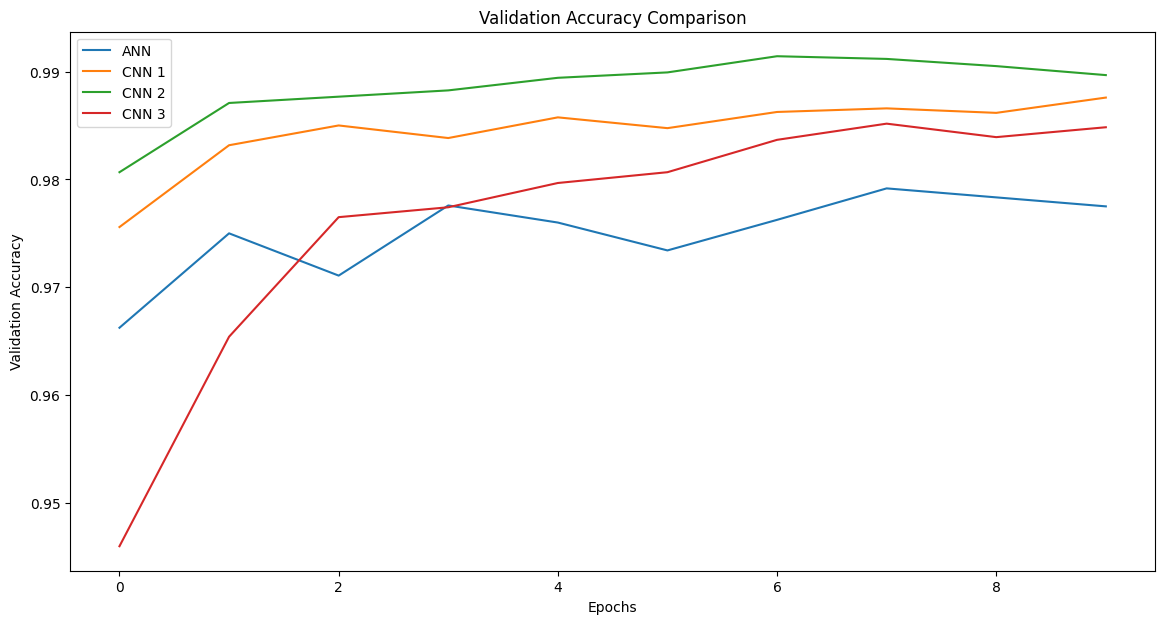

In [29]:
def plot_history(histories, title):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 7))
    for name, history in histories:
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

histories = [
    ('ANN', ann_history),
    ('CNN 1', cnn_history_1),
    ('CNN 2', cnn_history_2),
    ('CNN 3', cnn_history_3)
]

plot_history(histories, 'Validation Accuracy Comparison')
